# Assignment 1

## importing data from sheet

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

df_engelska = pd.read_excel("data/riket2023_åk9_np.xlsx", sheet_name = "Engelska", header=8)
df_matematik  = pd.read_excel("data/riket2023_åk9_np.xlsx", sheet_name = "Matematik", header=8)
df_svenska = pd.read_excel("data/riket2023_åk9_np.xlsx", sheet_name = "Svenska", header=8)
df_andrasprak = pd.read_excel("data/riket2023_åk9_np.xlsx", sheet_name = "Svenska som andraspråk", header=8)



## naming columns to be used

In [4]:
new_columns = [
    "Plats",
    "Huvudman",
    "Totalt (A-F)",
    "Flickor (A-F)",
    "Pojkar (A-F)",
    "Totalt (A-E)",
    "Flickor (A-E)",
    "Pojkar (A-E)",
    "Totalt (Poäng)",
    "Flickor (Poäng)",
    "Pojkar (Poäng)"
]
df_engelska.columns = new_columns
df_matematik.columns = new_columns
df_svenska.columns = new_columns
df_andrasprak.columns = new_columns

## Creating visual graphs

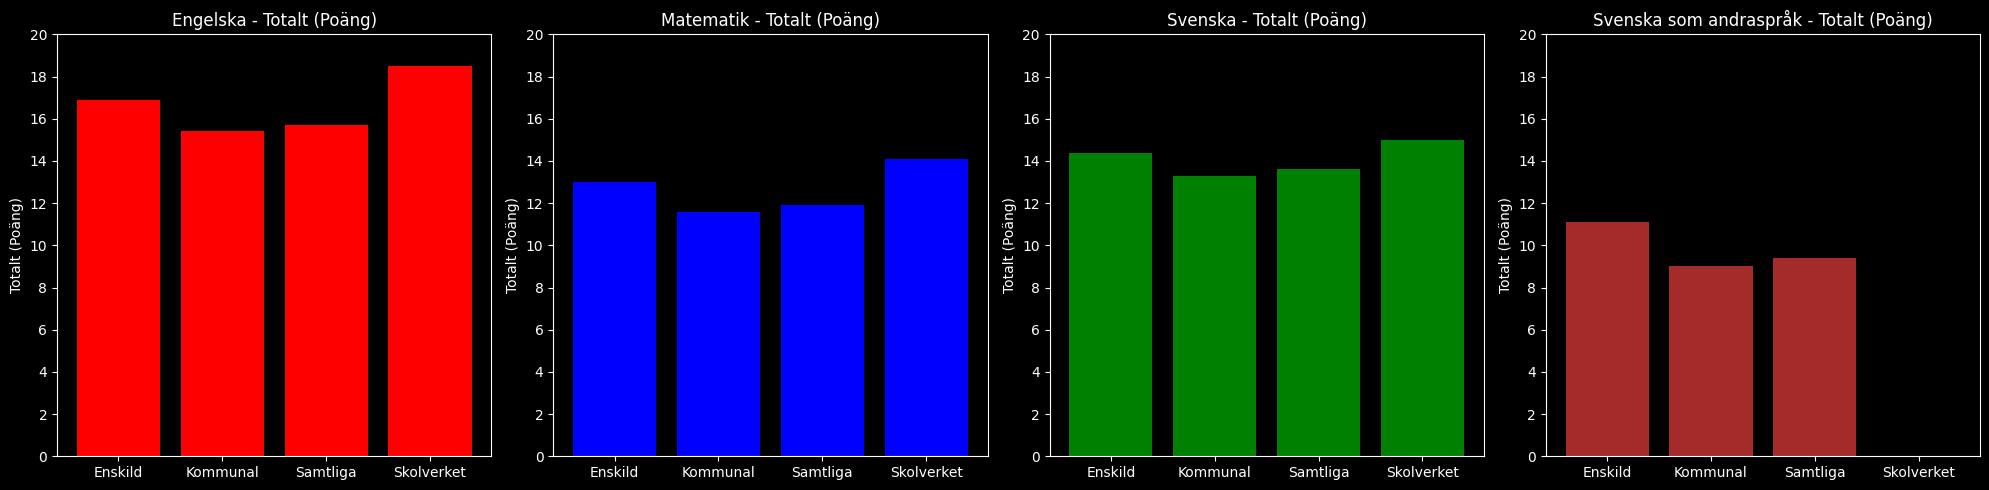

In [ ]:
## converts non numbers into NaN then gives them the value 0 if theres anything other than numbers in the column
df_andrasprak["Totalt (Poäng)"] = pd.to_numeric(df_andrasprak["Totalt (Poäng)"], errors = "coerce").fillna(0)

subjects = [
    ("Engelska", df_engelska),
    ("Matematik", df_matematik),
    ("Svenska", df_svenska),
    ("Svenska som andraspråk", df_andrasprak)
]

colors = ["red", "blue", "green", "brown"]
fig, axs = plt.subplots(1, 4, figsize=(20,5))
fig.patch.set_facecolor("black")

## sets the y axis intervals for a more generic visualisation of the graphs
y_min, y_max = 0, 20

for (subject_name, df), ax, color in zip(subjects, axs, colors):
    df_grouped = df.groupby("Huvudman")["Totalt (Poäng)"].mean().reset_index()

    ax.bar(df_grouped["Huvudman"], df_grouped["Totalt (Poäng)"], color = color)
    ax.set_title(f"{subject_name} - Totalt (Poäng)", color = "white")
    ax.set_ylabel("Totalt (Poäng)", color = "white")
    ax.set_ylim(y_min, y_max)
    ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))

    ax.set_facecolor("black")

    ax.tick_params(axis="x", colors="white")
    ax.tick_params(axis="y", colors="white")

    ## changes the visuals of the "graph box" to white
    for label in ax.get_xticklabels():
        label.set_color("white")
    for label in ax.get_yticklabels():
        label.set_color("white")

    for spine in ax.spines.values():
        spine.set_color("white")

   
plt.tight_layout()
plt.savefig("visualiseringar/totalt_poang.png")
plt.show()

# Assignment 2

### importing data from sheet and naming columns to be used

In [ ]:
import plotly.express as px

df_betyg = pd.read_excel("data/betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1B", header=7)
df_betyg.columns = [
    "Läsår",
    "Genomsnittligt meritvärde beräknat på 16 ämnen Totalt",
    "Genomsnittligt meritvärde beräknat på 16 ämnen Flickor",
    "Genomsnittligt meritvärde beräknat på 16 ämnen Pojkar",
    "Genomsnittligt meritvärde beräknat på 17 ämnen Totalt",
    "Genomsnittligt meritvärde beräknat på 17 ämnen Flickor",
    "Genomsnittligt meritvärde beräknat på 17 ämnen Pojkar",
    "Andel (%) elever som saknar godkänt betyg i ämnen Totalt",
    "Andel (%) elever som saknar godkänt betyg i ämnen Flickor",
    "Andel (%) elever som saknar godkänt betyg i ämnen Pojkar"
]


### Linechart for subjects of missing criterias

In [44]:
df_line = df_betyg[df_betyg["Läsår"].isin(["2018/19", "2019/20", "2020/21", "2021/22", "2022/23"])]

fig = px.line(
        df_line,
    x="Läsår",
    y=["Andel (%) elever som saknar godkänt betyg i ämnen Totalt", 
       "Andel (%) elever som saknar godkänt betyg i ämnen Flickor",
       "Andel (%) elever som saknar godkänt betyg i ämnen Pojkar"],
    markers=True,
    color_discrete_sequence=["cyan", "magenta", "navy"],
    title="Andel elever med saknat godkänt betyg (2018/19-2022/23)",
    labels={"value": "andel (%)", "Läsår": "Läsår"}
)
fig.update_yaxes(range=[0,50]) ## percentages are normally from 0-100 but i didnt think it was a good visualisation

fig.update_layout(
        yaxis=dict(
        tickmode="linear",
        dtick=10,  
        gridcolor="darkgray",
        zerolinecolor="gray"
    ),
    paper_bgcolor="black",
    plot_bgcolor="gray", 
    font=dict(color="white")
)

fig.write_html("Visualiseringar/andel_saknat_betyg_linjediagram.html")
fig.show()

### Linechart for merit values of students

In [43]:
df_line = df_betyg[df_betyg["Läsår"].isin(["2018/19", "2019/20", "2020/21", "2021/22", "2022/23"])]

fig = px.line(
        df_line,
    x="Läsår",
    y=["Genomsnittligt meritvärde beräknat på 16 ämnen Totalt", 
       "Genomsnittligt meritvärde beräknat på 16 ämnen Flickor",
       "Genomsnittligt meritvärde beräknat på 16 ämnen Pojkar"],
    markers=True,
    color_discrete_sequence=["cyan", "magenta", "navy"],
    title="Genomsnittligt meritvärde beräknat på 16 ämnen (2018/19-2022/23)",
    labels={"value": "Meritvärde", "Läsår": "Läsår"}
)

fig.update_layout(
        yaxis=dict(
        tickmode="linear",
        dtick=10,  
        gridcolor="darkgray",
        zerolinecolor="gray"
    ),
    paper_bgcolor="black",
    plot_bgcolor="gray", 
    font=dict(color="white")
)

fig.write_html("Visualiseringar/meritvarde_16_amnen_linjediagram.html")
fig.show()